In [1]:
pip install pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


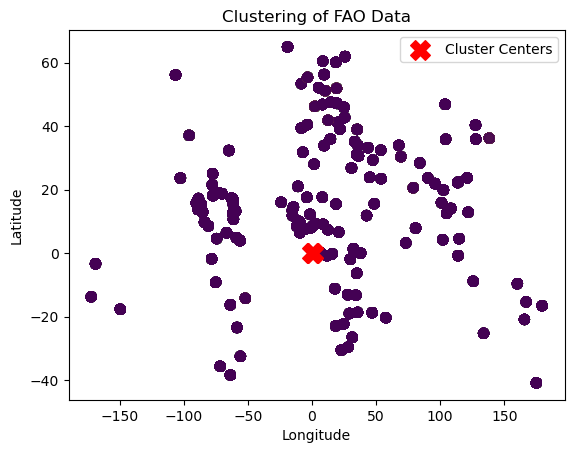

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Load the FAO dataset 
fao_data = pd.read_csv('FAO.csv', encoding='latin-1')
# Select relevant columns for clustering
columns_for_clustering = ["latitude", "longitude", "Y1961", "Y1962", "Y1963", "Y1964", "Y1965", "Y1966", "Y1967", "Y1968", "Y1969", "Y1970"]
# Extract the selected columns
data_for_clustering = fao_data[columns_for_clustering]
# Handle non-numeric values
data_for_clustering = data_for_clustering.apply(pd.to_numeric, errors='coerce')
# Drop rows with missing values
data_for_clustering = data_for_clustering.dropna()
# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_for_clustering)
# Perform clustering using KMeans
kmeans = KMeans(n_clusters=3)  
cluster_labels = kmeans.fit_predict(normalized_data)
# Create a new dataframe with the original index and cluster labels
clustered_data = pd.DataFrame(index=data_for_clustering.index)
clustered_data['Cluster'] = cluster_labels
# Concatenate the cluster labels with the original dataframe
fao_data = pd.concat([fao_data, clustered_data], axis=1)
# Plotting the clusters
plt.scatter(fao_data['longitude'], fao_data['latitude'], c=fao_data['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Clustering of FAO Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

Text(0, 0.5, 'Y1961')

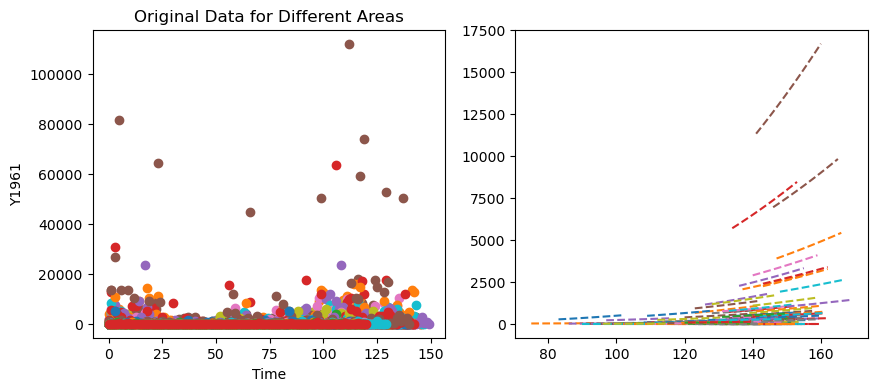

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
areas = fao_data['Area'].unique()
areas.sort()  
# Function to fit 
def polynomial_function(x, *coefficients):
    return np.polyval(coefficients, x)
# Initial guess for parameters 
order = 2 
initial_guess = np.ones(order + 1)
# Plotting the results for each area
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

for area in areas:
    area_data = fao_data[fao_data['Area'] == area]
    x_data = np.arange(len(area_data))  

    attribute_values = area_data['Y1961'].values  

    # Check for NaN or infinite values in the data
    if np.isnan(attribute_values).any() or np.isinf(attribute_values).any():
        # Handle or remove NaN or infinite values
        attribute_values = np.nan_to_num(attribute_values)

    # Fit the polynomial model to the data using curve_fit
    coefficients, covariance = curve_fit(polynomial_function, x_data, attribute_values, p0=initial_guess)

    # Predict values for the next 20 time points
    future_x = np.arange(len(area_data), len(area_data) + 20, 1)
    predicted_values = polynomial_function(future_x, *coefficients)

    # Plotting the results separately
    ax1.scatter(x_data, attribute_values, label=f'{area} - Original Data')
    ax2.plot(future_x, predicted_values, label=f'{area} - Fitted Polynomial (Order {order})', linestyle='dashed')

# Title and labels for the first subplot
ax1.set_title('Original Data for Different Areas')
ax1.set_xlabel('Time')
ax1.set_ylabel('Y1961') 



C:\Users\Tech Assignment 02\AppData\Local\Temp\ipykernel_6776\360746829.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


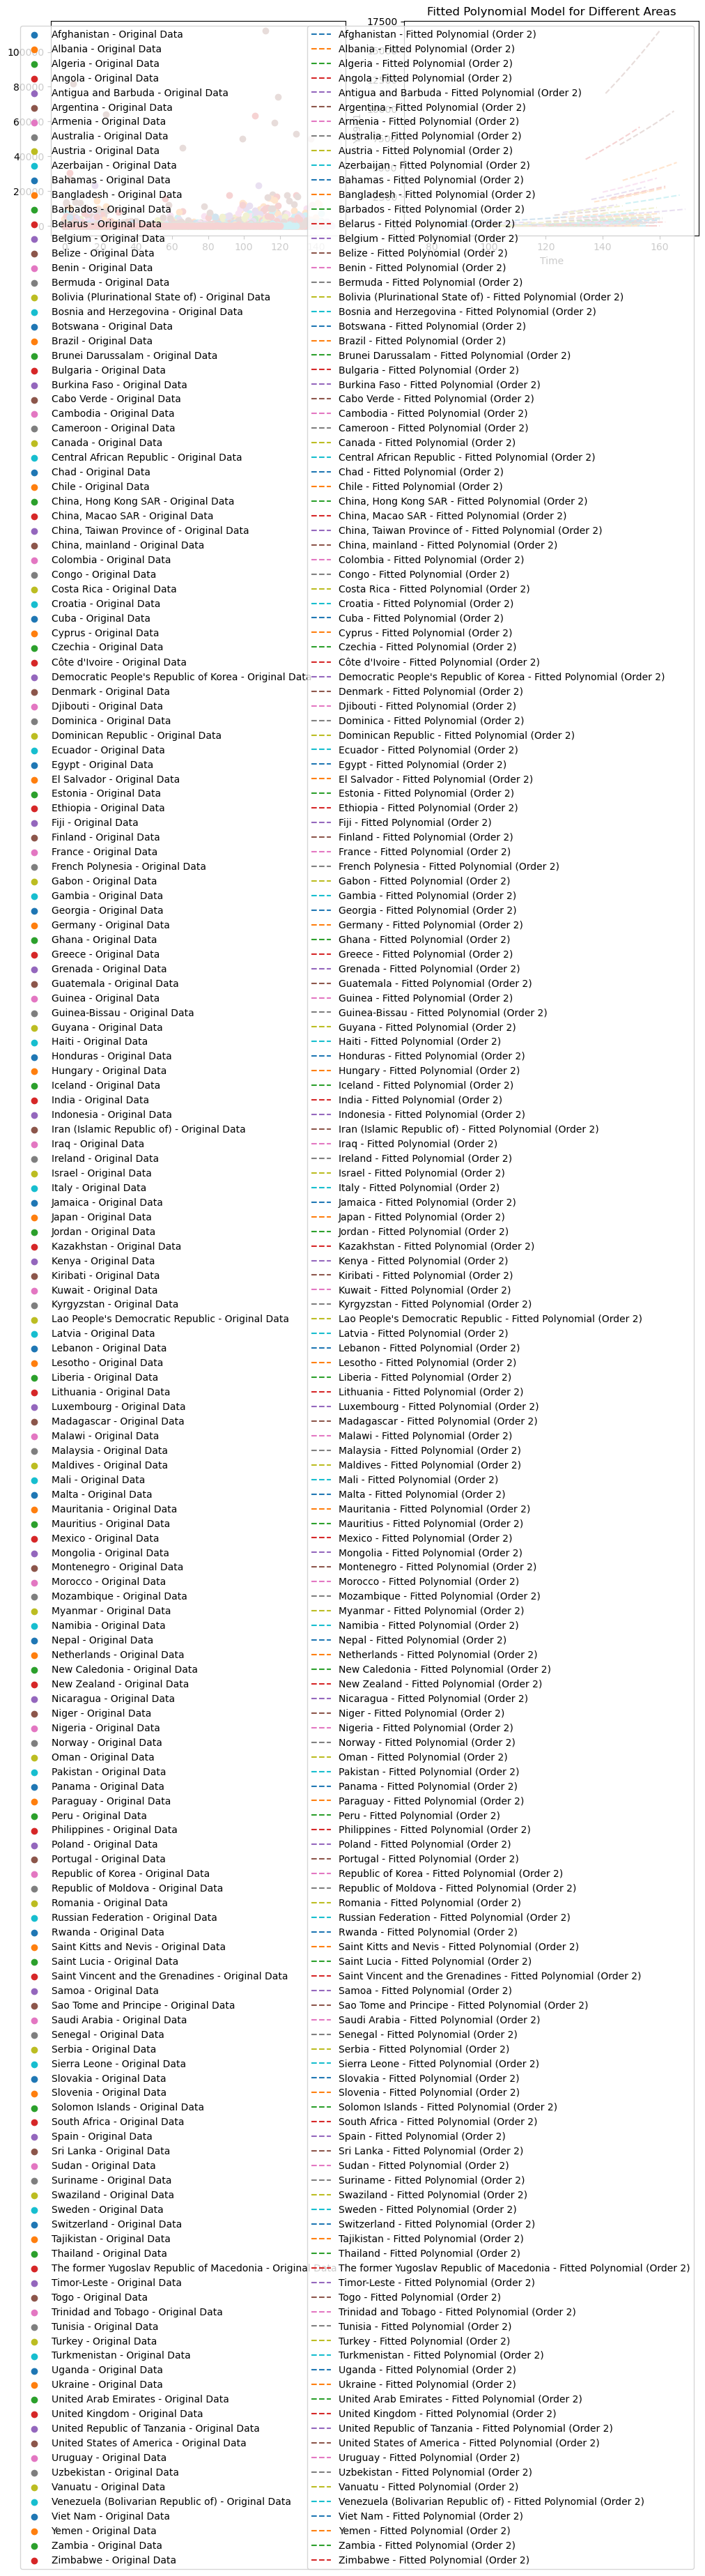

In [8]:
# Plotting the results for each area
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

for area in areas:
    area_data = fao_data[fao_data['Area'] == area]
    x_data = np.arange(len(area_data))  

    attribute_values = area_data['Y1961'].values  

    # Check for NaN or infinite values in the data
    if np.isnan(attribute_values).any() or np.isinf(attribute_values).any():
        # Handle or remove NaN or infinite values
        attribute_values = np.nan_to_num(attribute_values)

    # Fit the polynomial model to the data using curve_fit
    coefficients, covariance = curve_fit(polynomial_function, x_data, attribute_values, p0=initial_guess)

    # Predict values for the next 20 time points
    future_x = np.arange(len(area_data), len(area_data) + 20, 1)
    predicted_values = polynomial_function(future_x, *coefficients)

    # Plotting the results separately
    ax1.scatter(x_data, attribute_values, label=f'{area} - Original Data')
    ax2.plot(future_x, predicted_values, label=f'{area} - Fitted Polynomial (Order {order})', linestyle='dashed')
    # Title and labels for the second subplot
ax2.set_title('Fitted Polynomial Model for Different Areas')
ax2.set_xlabel('Time')
ax2.set_ylabel('Y1961')  

# Show legends for both subplots
ax1.legend()
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


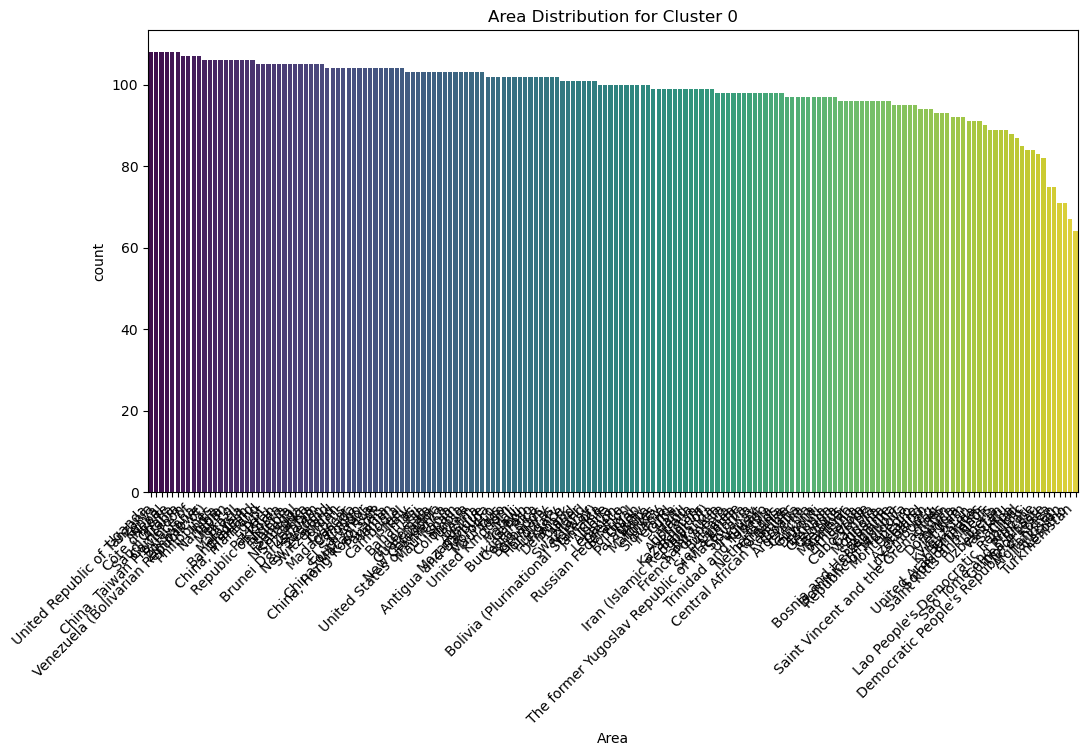

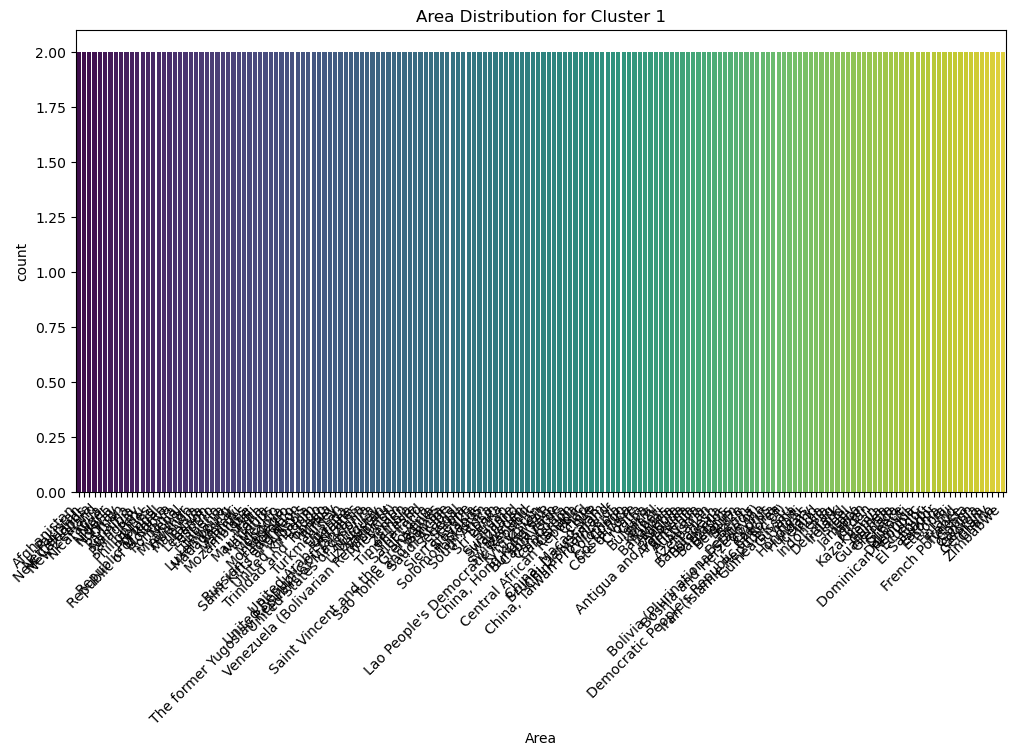

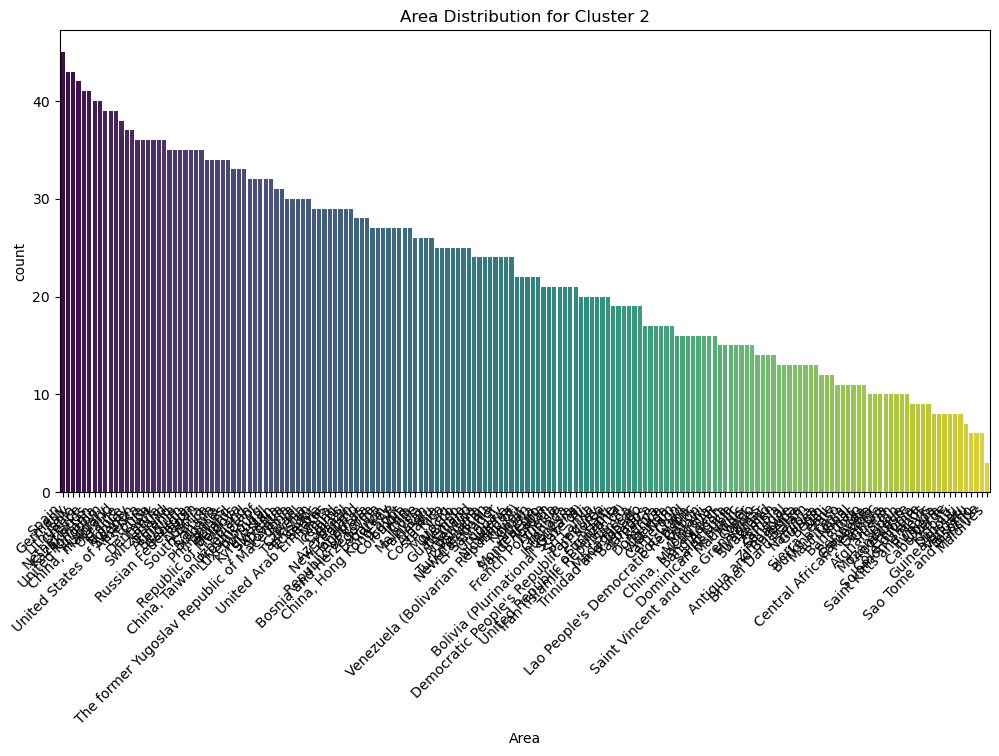

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
selected_features = ['Area', 'Unit', 'Element', 'Item']
# Extract the selected features
data = fao_data[selected_features]
# Identify numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns
non_numeric_cols = list(set(data.columns) - set(numeric_cols))
# Create a ColumnTransformer to handle numeric and non-numeric columns separately
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_cols),
        ('non_numeric', OneHotEncoder(), non_numeric_cols)
    ]
)

# Create a pipeline with preprocessing and clustering
pipeline = make_pipeline(preprocessor, KMeans(n_clusters=3))
# Apply the pipeline
clusters = pipeline.fit_predict(data)
# Add the cluster information to the DataFrame
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = clusters
# Create separate plots for each cluster
for cluster_id in range(3):
    plt.figure(figsize=(12, 6))
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster_id]
    sns.countplot(x='Area', data=cluster_data, order=cluster_data['Area'].value_counts().index, palette='viridis')
    plt.title(f'Area Distribution for Cluster {cluster_id}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


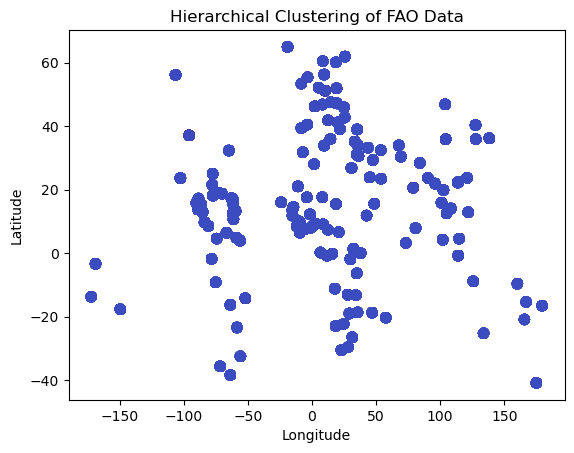

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Load the FAO dataset 
fao_data = pd.read_csv('FAO.csv', encoding='latin-1')

# Select relevant columns for clustering
columns_for_clustering = ["latitude", "longitude", "Y1961", "Y1962", "Y1963", "Y1964", "Y1965", "Y1966", "Y1967", "Y1968", "Y1969", "Y1970"]

# Extract the selected columns
data_for_clustering = fao_data[columns_for_clustering]

# Handle non-numeric values
data_for_clustering = data_for_clustering.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data_for_clustering = data_for_clustering.dropna()

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_for_clustering)

# Perform hierarchical clustering using AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
cluster_labels = agg_clustering.fit_predict(normalized_data)

# Create a new dataframe with the original index and cluster labels
clustered_data = pd.DataFrame(index=data_for_clustering.index)
clustered_data['Cluster'] = cluster_labels

# Concatenate the cluster labels with the original dataframe
fao_data = pd.concat([fao_data, clustered_data], axis=1)

# Visualize the clustering results
plt.scatter(fao_data['longitude'], fao_data['latitude'], c=fao_data['Cluster'], cmap='coolwarm', s=50, alpha=0.7)
plt.title('Hierarchical Clustering of FAO Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

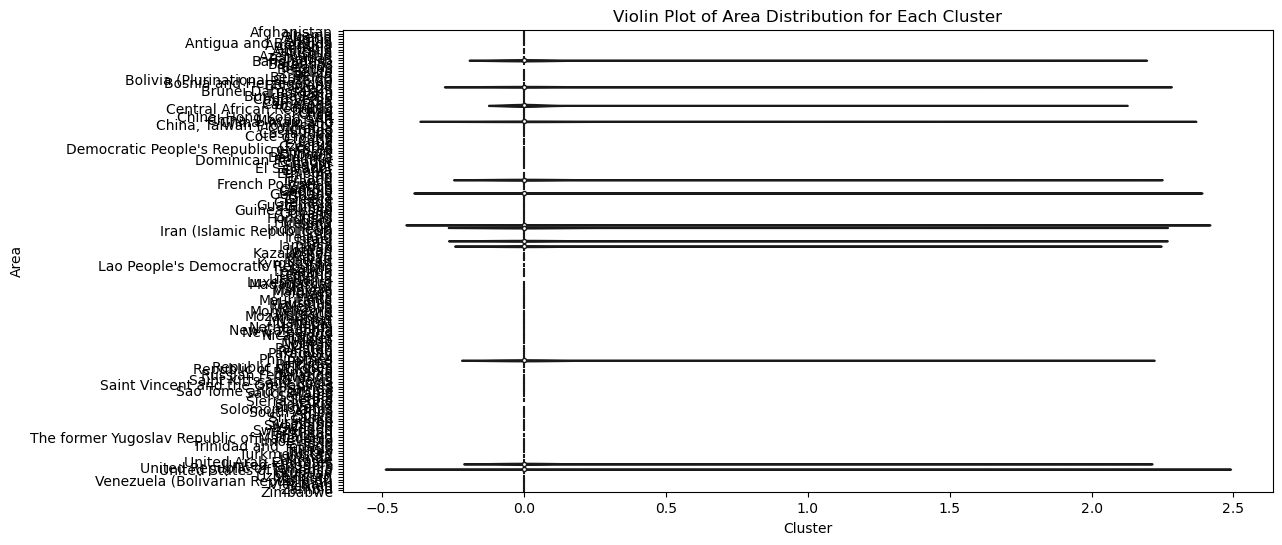

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have 'fao_data' with the 'Cluster' column
# Extract the selected features
selected_features = ['Area', 'Unit', 'Element', 'Item', 'Cluster']
data_with_clusters = fao_data[selected_features]

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Cluster', y='Area', data=data_with_clusters, palette='viridis')
plt.title('Violin Plot of Area Distribution for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Area')
plt.show()